In [ ]:
import piplite
await piplite.install('seaborn')

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [5]:
df=pd.read_csv('creditcard.csv')

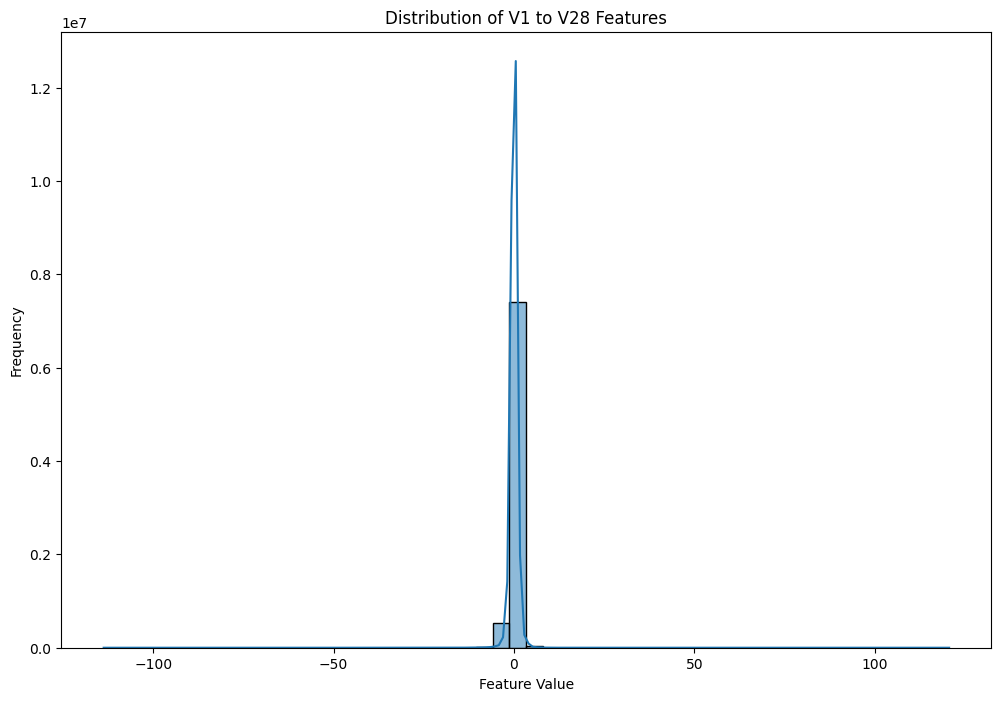

In [6]:
v_columns = df.loc[:, 'V1':'V28']

# Reshaping the data for seaborn's pairplot
v_columns = pd.melt(v_columns)

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Create a histogram to compare the distributions of all 'V1' to 'V28' features
sns.histplot(data=v_columns, x='value', bins=50, kde=True)

# Add labels and title
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Distribution of V1 to V28 Features')

# Show plot
plt.show()

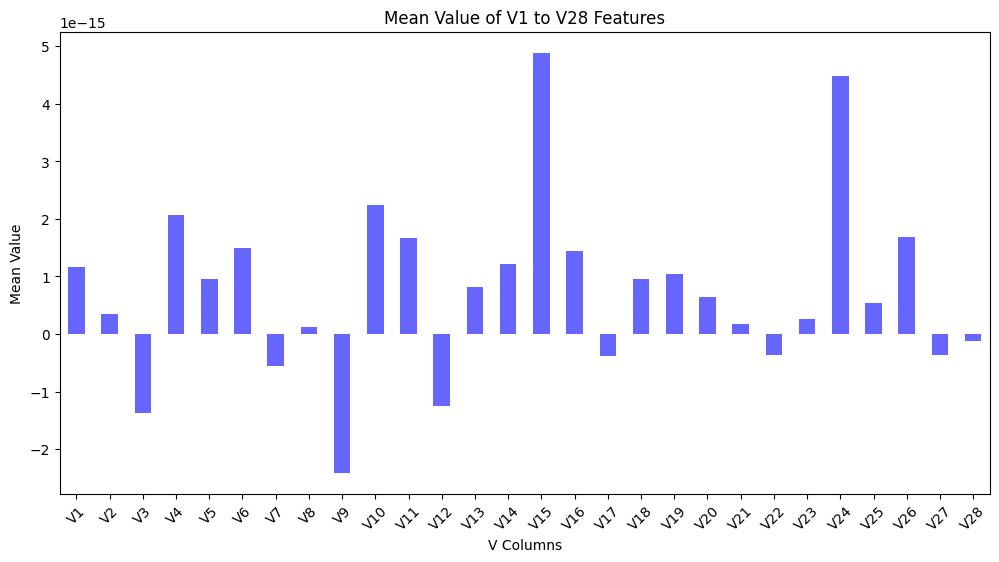

In [8]:
v_means = df.loc[:, 'V1':'V28'].mean()

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Create a bar plot to compare the means
v_means.plot(kind='bar', color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('V Columns')
plt.ylabel('Mean Value')
plt.title('Mean Value of V1 to V28 Features')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.show()

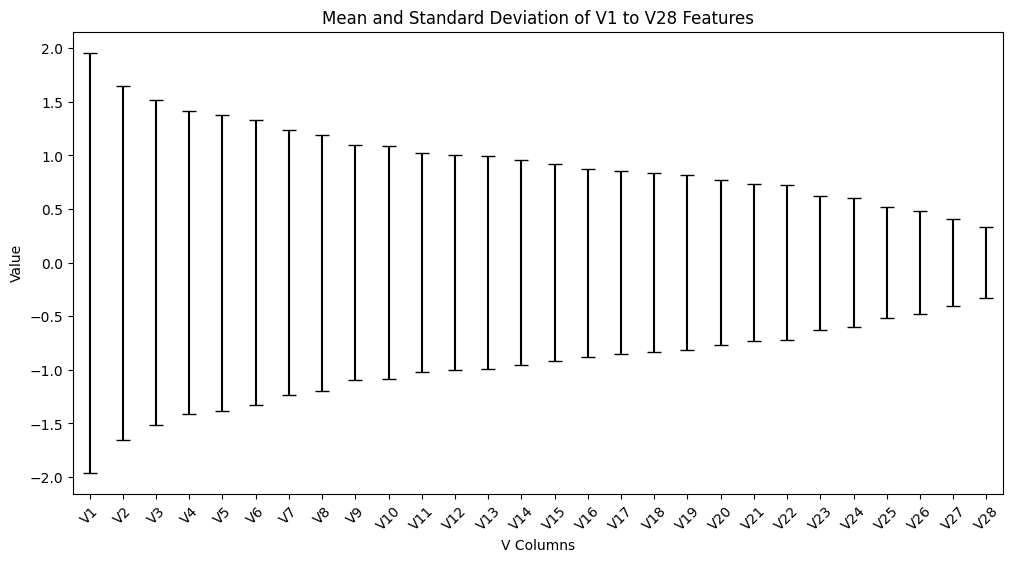

In [9]:
v_means = df.loc[:, 'V1':'V28'].mean()
v_std = df.loc[:, 'V1':'V28'].std()

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Create a bar plot to compare the means with error bars for standard deviation
v_means.plot(kind='bar', yerr=v_std, color='blue', alpha=0.6, capsize=5)

# Add labels and title
plt.xlabel('V Columns')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation of V1 to V28 Features')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.show()

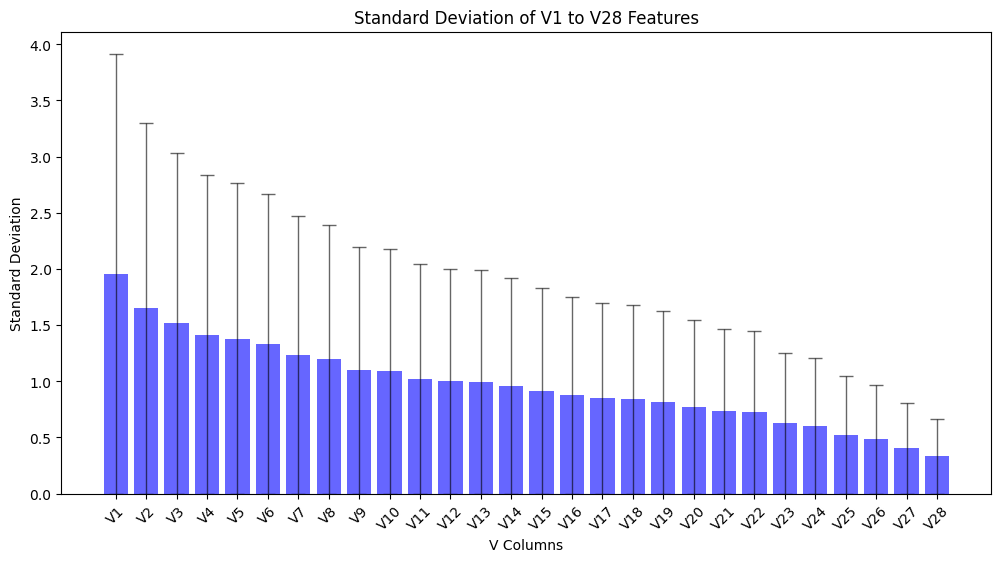

In [10]:
v_std = df.loc[:, 'V1':'V28'].std()

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Create a bar plot to compare the standard deviations
plt.bar(v_std.index, v_std, color='blue', alpha=0.6, yerr=v_std, capsize=5, error_kw={'capsize': 5, 'elinewidth': 1, 'alpha':0.6})

# Add labels and title
plt.xlabel('V Columns')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of V1 to V28 Features')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.show()

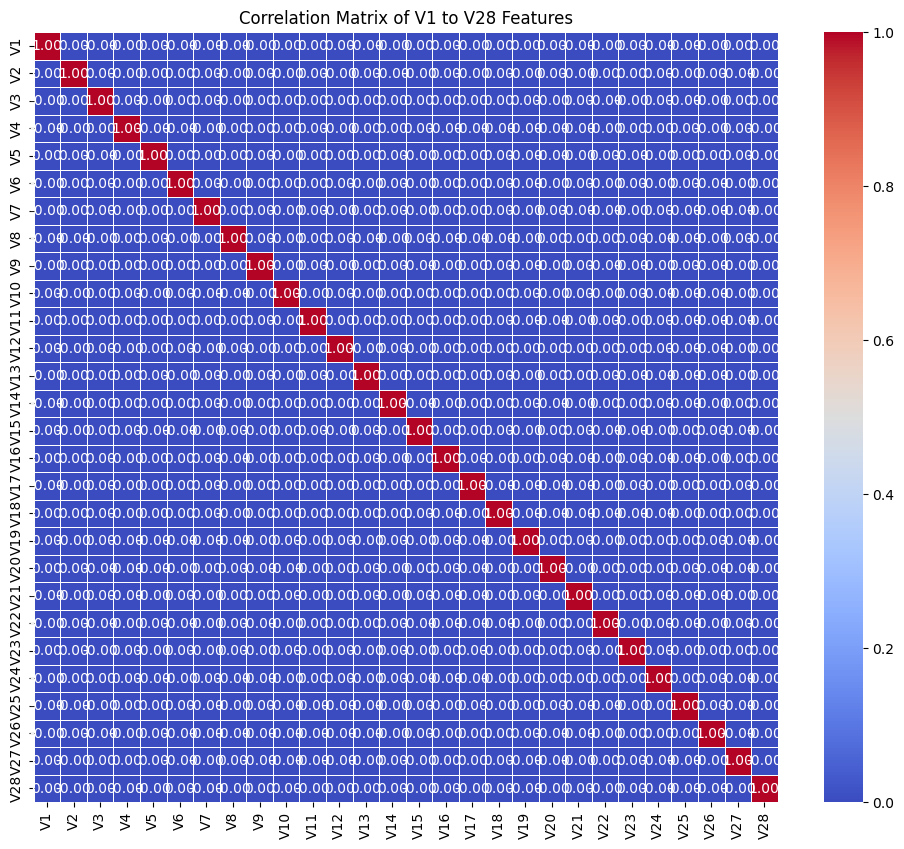

In [11]:
corr_matrix = df.loc[:, 'V1':'V28'].corr()

# Set up the figure and axis
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix of V1 to V28 Features')

# Show plot
plt.show()

In [17]:
x = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (x):", x_train.shape)
print("Testing set shape (x):", x_test.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (y):", y_test.shape)

Training set shape (x): (227845, 30)
Testing set shape (x): (56962, 30)
Training set shape (y): (227845,)
Testing set shape (y): (56962,)


In [20]:
lre=LinearRegression()  # Initialize linear regression model
lre.fit(x_train, y_train)  # Train the model using training data
print("r2 score for test:",lre.score(x_test, y_test))  # Print R-squared score for testing data
print("r2 score for train:",lre.score(x_train, y_train))  # Print R-squared score for training data

r2 score for test: 0.5166663660896542
r2 score for train: 0.5228417791205773


In [26]:
Rcross = cross_val_score(lre, x, y, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.46701674533630877 and the standard deviation is 0.09632478316119819


In [28]:
print(x_train.skew())
print(x_test.skew())

Time      -0.036053
V1        -3.320269
V2        -4.826847
V3        -2.219375
V4         0.677776
V5        -2.928646
V6         1.977725
V7         3.744620
V8        -8.445014
V9         0.543603
V10        1.212102
V11        0.359527
V12       -2.281334
V13        0.067612
V14       -1.992812
V15       -0.308053
V16       -1.113875
V17       -3.975821
V18       -0.266115
V19        0.107289
V20       -1.977859
V21        3.656863
V22       -0.230008
V23       -6.285467
V24       -0.552668
V25       -0.417168
V26        0.579265
V27       -0.038330
V28       11.776522
Amount    18.352356
dtype: float64
Time     -0.033628
V1       -3.122788
V2       -3.775218
V3       -2.321971
V4        0.670397
V5       -0.240913
V6        1.189546
V7       -2.603442
V8       -8.803652
V9        0.598454
V10       1.089906
V11       0.344332
V12      -2.265518
V13       0.055699
V14      -2.004765
V15      -0.309857
V16      -1.048421
V17      -3.299149
V18      -0.235022
V19       0.116836
V20  

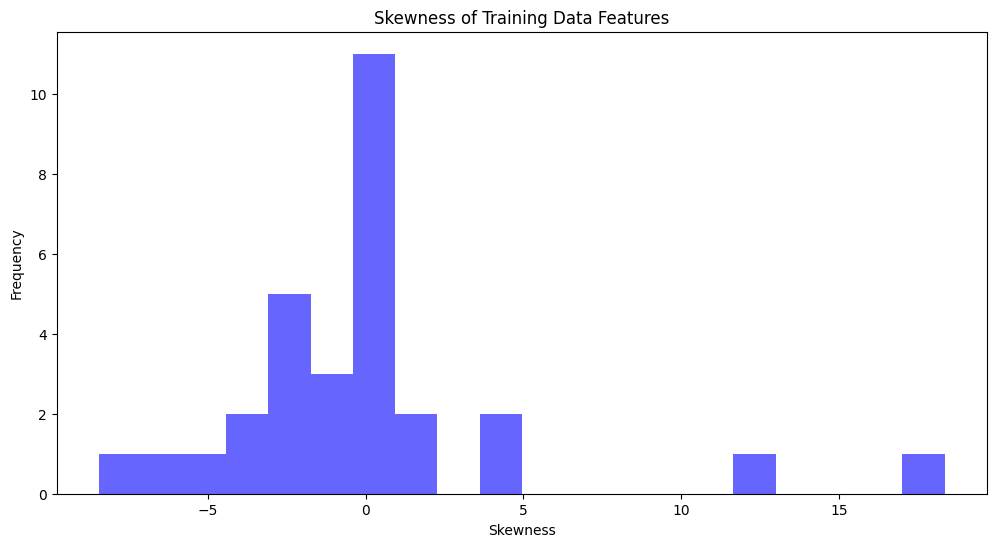

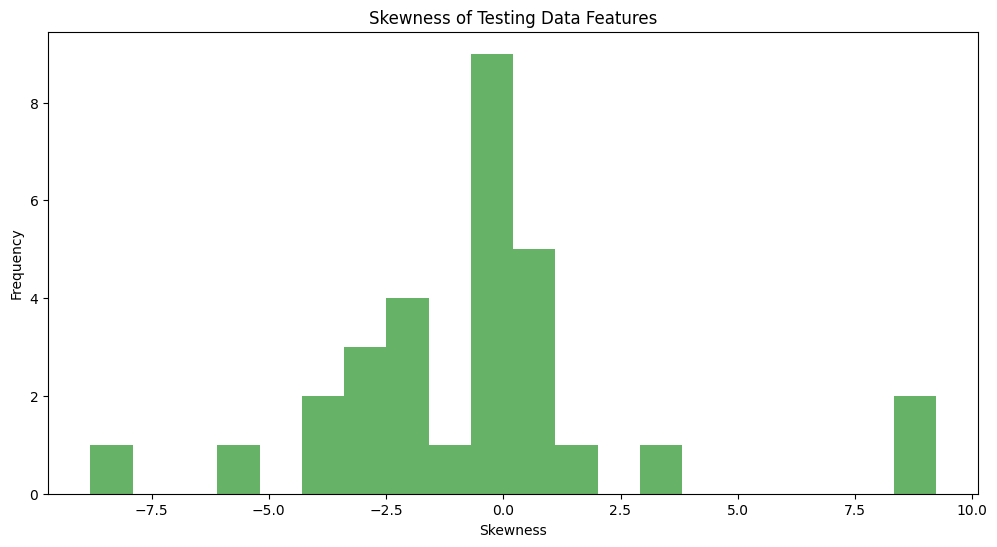

In [27]:
# Plot histograms of the skewness of training data
plt.figure(figsize=(12, 6))
plt.hist(x_train.skew(), bins=20, color='blue', alpha=0.6)
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Skewness of Training Data Features')
plt.show()

# Plot histograms of the skewness of testing data
plt.figure(figsize=(12, 6))
plt.hist(x_test.skew(), bins=20, color='green', alpha=0.6)
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Skewness of Testing Data Features')
plt.show()

In [30]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer

def skew_autotransform(DF, include=None, exclude=None, threshold=1, exp=False):
    # Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')

    # Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        # If minimum is negative, offset all values by a constant to move all values to positive territory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series

    # Go through desired columns in DataFrame
    for col in colnames:
        # Get column skewness
        skew = DF[col].skew()
        transformed = True

        # If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            # Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
                # Apply log transformation
                DF[col] = DF[col].apply(np.log)
            else:
                # Apply boxcox transformation
                pt = PowerTransformer(method='box-cox')
                DF[col] = pt.fit_transform(DF[col].values.reshape(-1, 1)).flatten()
            skew_new = DF[col].skew()

        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            # Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
                # Apply exp transformation
                DF[col] = DF[col].pow(10)
            else:
                # Apply boxcox transformation
                pt = PowerTransformer(method='box-cox')
                DF[col] = pt.fit_transform(DF[col].values.reshape(-1, 1)).flatten()
            skew_new = DF[col].skew()

        else:
            # Flag if no transformation was performed
            transformed = False
            skew_new = skew

        # Print skewness values
        print('\n ------------------------------------------------------')
        if transformed:
            print('\n %r had %r skewness of %2.2f' % (col, skewType, skew))
            print('\n Transformation yielded skewness of %2.2f' % skew_new)
        else:
            print('\n NO TRANSFORMATION APPLIED FOR %r. Skewness = %2.2f' % (col, skew))

    return DF

In [32]:
transformed_df = skew_autotransform(df)


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Time'. Skewness = -0.04

 ------------------------------------------------------

 'V1' had 'negative' skewness of -3.28

 Transformation yielded skewness of -0.13

 ------------------------------------------------------

 'V2' had 'negative' skewness of -4.62

 Transformation yielded skewness of 0.84

 ------------------------------------------------------

 'V3' had 'negative' skewness of -2.24

 Transformation yielded skewness of 0.02

 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V4'. Skewness = 0.68

 ------------------------------------------------------

 'V5' had 'negative' skewness of -2.43

 Transformation yielded skewness of 0.57

 ------------------------------------------------------

 'V6' had 'positive' skewness of 1.83

 Transformation yielded skewness of 0.45

 ------------------------------------------------------

 'V7' had 'positive' s

In [39]:
transformed_x = transformed_df.drop(columns=['Class'])
transformed_y = transformed_df['Class']

# Split the data into training and testing sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(transformed_x, transformed_y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (x):", x_train2.shape)
print("Testing set shape (x):", x_test2.shape)
print("Training set shape (y):", y_train2.shape)
print("Testing set shape (y):", y_test2.shape)

Training set shape (x): (227845, 30)
Testing set shape (x): (56962, 30)
Training set shape (y): (227845,)
Testing set shape (y): (56962,)


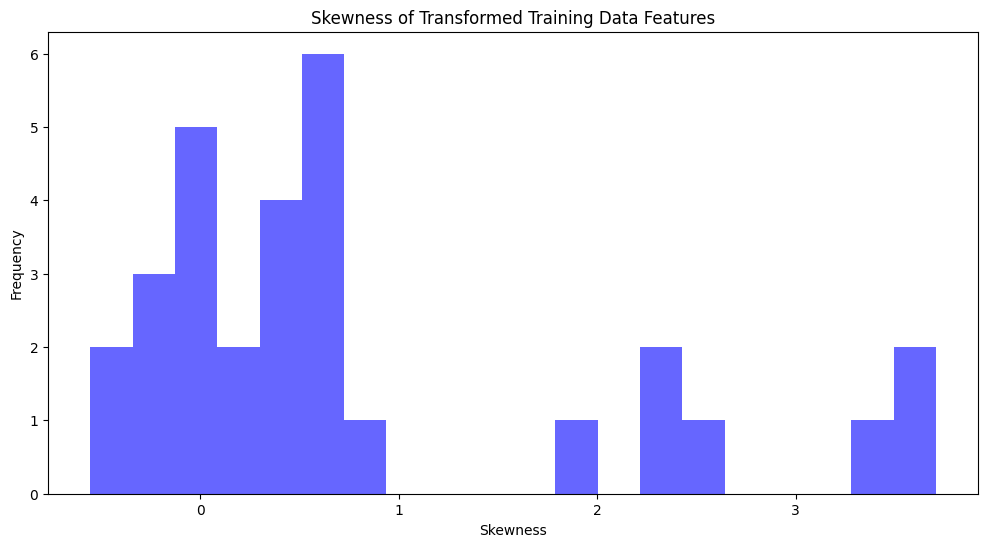

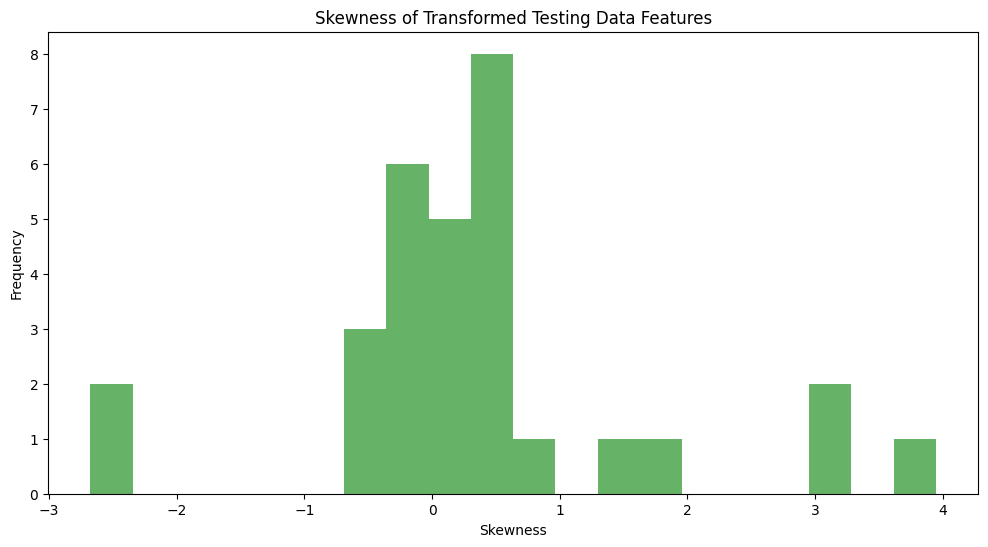

In [40]:
# Plot histograms of the skewness of training data
plt.figure(figsize=(12, 6))
plt.hist(x_train2.skew(), bins=20, color='blue', alpha=0.6)
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Skewness of Transformed Training Data Features')
plt.show()

# Plot histograms of the skewness of testing data
plt.figure(figsize=(12, 6))
plt.hist(x_test2.skew(), bins=20, color='green', alpha=0.6)
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Skewness of Transformed Testing Data Features')
plt.show()

In [41]:
lre2=LinearRegression()  # Initialize linear regression model
lre2.fit(x_train2, y_train2)  # Train the model using training data
print("r2 score for transformed test:",lre.score(x_test2, y_test2))  # Print R-squared score for testing data
print("r2 score for transformed train:",lre.score(x_train2, y_train2))  # Print R-squared score for training data

r2 score for transformed test: 0.030563851255302588
r2 score for transformed train: 0.029905326970823043


In [42]:
Rcross2 = cross_val_score(lre2, transformed_x, transformed_y, cv=4)
print("The mean of the transformed folds are", Rcross2.mean(), "and the standard deviation is" , Rcross2.std())

The mean of the transformed folds are 0.4876075531848859 and the standard deviation is 0.08069450007929622


In [46]:
y_pred= lre2.predict(x_test2)
mse= mean_squared_error(y_test2, y_pred)
print("mse score:", mse)

mse score: 0.4711873337283529


In [47]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [0.5, 1.0, 1.5],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.7, 0.8],
    'subsample_freq': [2, 3, 4]
}

# Create a LightGBM classifier
lgbm = LGBMClassifier(random_state=42, device="cpu")

# Perform grid search
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=4, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)